LINEAR MODEL
---

This is  a linear model to predict the age of employees leaving  a company.<br/>
Used the dataset provided by OneCampus Academy in the model building.<br/>

STEPS TAKEN FROM DATA IMPORTATION, EXPLORATORY ANALYSIS TO MODEL BUILDING
---
After getting the data to my jupyter notebook, there were no missing data and so proceeded on to check the cardinality  on categorical data frm the dataset.<br/>
Correlation amongst the features to be used as my feature matrix were not highly correlated hence did not drop any features due to multicollinearity<br/>



In [1]:
#importing the necessary python libraries in building a linear model and data wrangle
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sb
from pandas import set_option
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
#warnings.SimpleFitter(action="ignore", category=FutureWarning)


In [2]:
#my wrangle function to help avoid repetition in the codeset
def wrangle(filepath):
    #importing the dataset
    
    df = pd.read_csv(filepath)
    
    # extracting low/high cardinality cols (redundant)
    
    df.drop(columns = ["EmployeeCount", "EmployeeNumber", 
                  "Over18", "StandardHours"], inplace = True)
    
     # dropping features that may constitute to leakage to the model
     # Appendinding `high_low_card_cols`
    
    leaky_cols = [i for i in df.columns if "Years" in i]
    df.drop(columns = leaky_cols, inplace = True)
    
    #dropping multicollinear features
    df.drop(
        columns = ["JobLevel", "PerformanceRating"],
        inplace = True)

   
    return df

In [4]:
data = wrangle("../WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data.shape)

(1470, 24)


In [76]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Single,5993,19479,8,Yes,11,1,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,Married,5130,24907,1,No,23,4,1,3,3
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Single,2090,2396,6,Yes,15,2,0,3,3
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Married,2909,23159,1,Yes,11,3,0,3,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,Married,3468,16632,9,No,12,4,1,3,3


In [77]:
data.select_dtypes("object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# checking for missing data
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
dtype: int64

In [20]:
# # checking for cardinality in my data and dropping columns with very high/low cadinality
# # print(data.columns)
# data["StandardHours"].nunique()

1

In [30]:
# Extracting leaky features
# leaky_cols = [i for i in data.columns if "Years" in i]
# leaky_cols

['TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

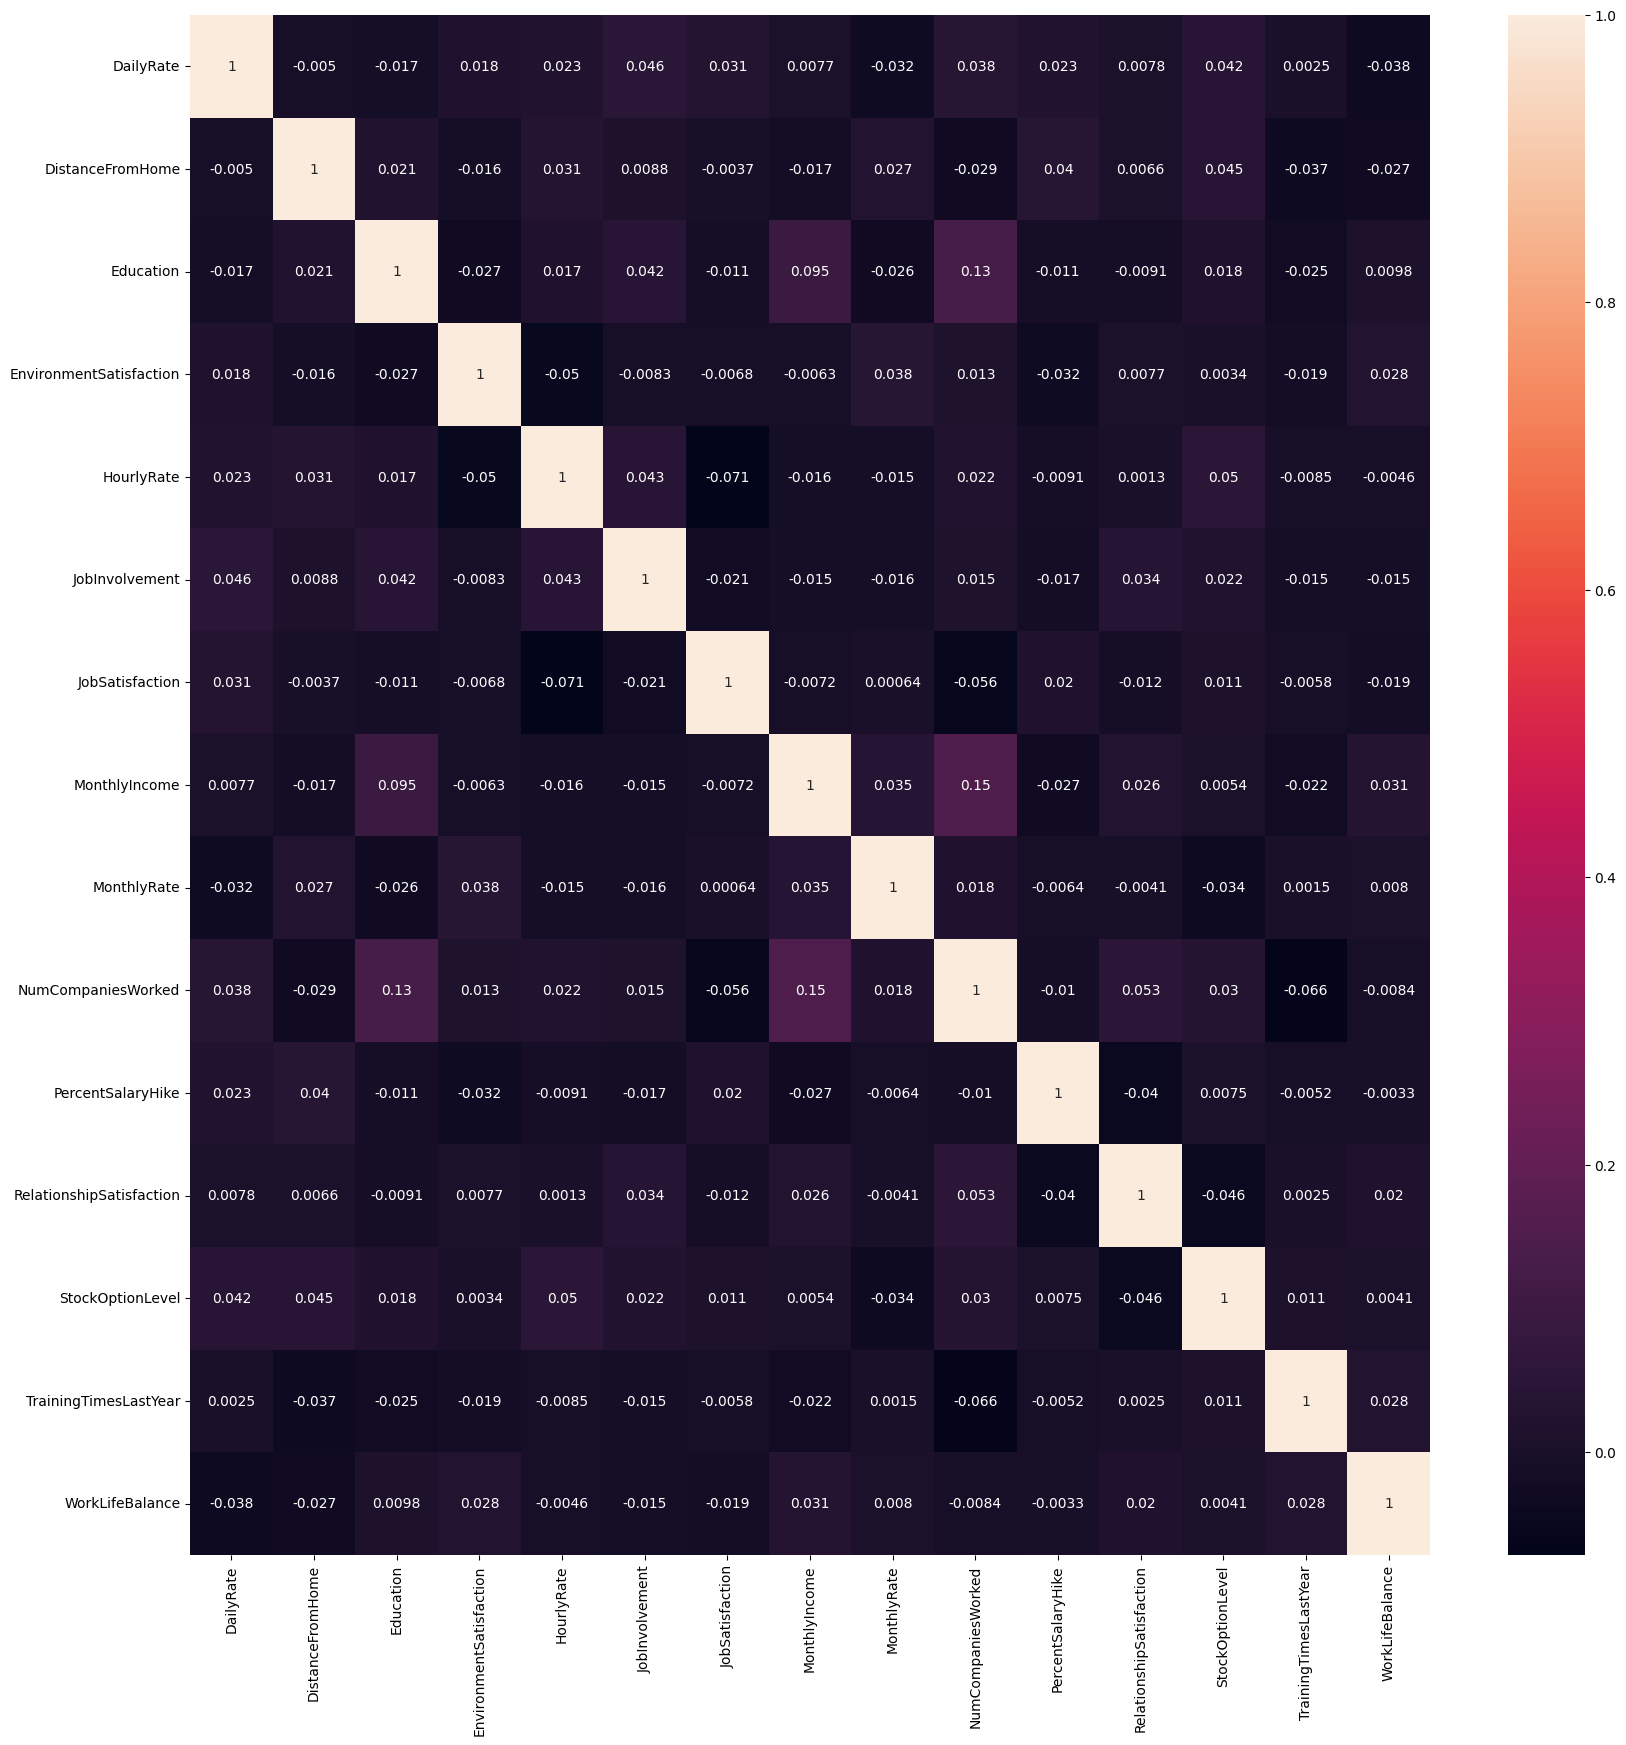

In [78]:
#checking for multicollinearity amongst the numerical features
df1 = data.select_dtypes("number").drop(columns="Age")
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(df1.corr(), annot=True);

EXPLORE
---

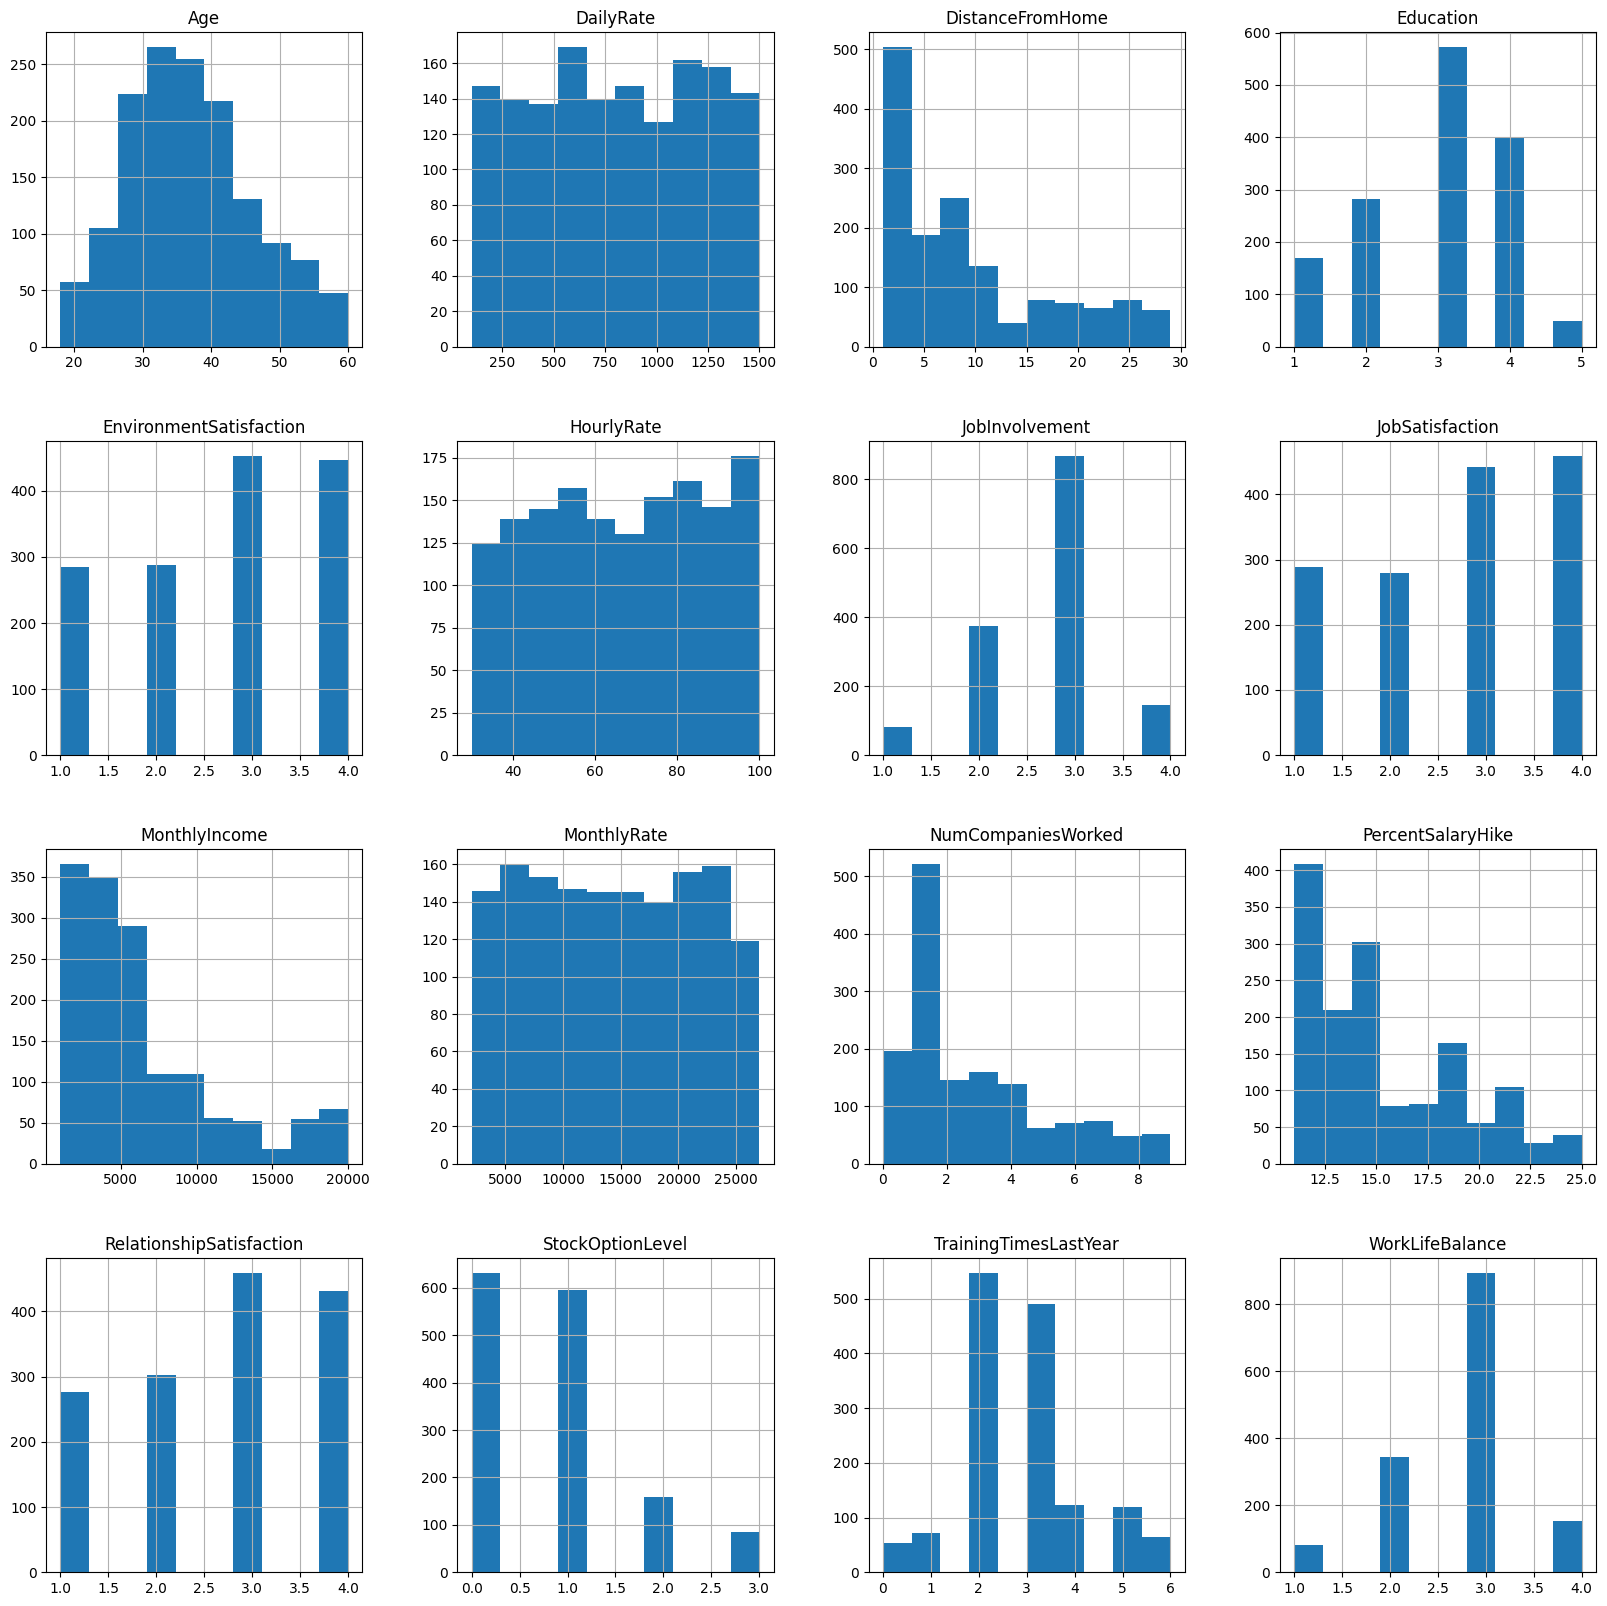

In [81]:
#Visualizing the data using  histogram
data.select_dtypes("number").hist(figsize = (20, 20));

Most of the employees on this dataset are aged betweeen 30 and 40 years.<br>

What is the marital status of most employees on this data set?<br>
Creating a horizontal plot representing different employees marital status.<br>
An employee is either Single, Married or divorced.<br>
Lets check the visual representation of this.<br>

In [83]:
data["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

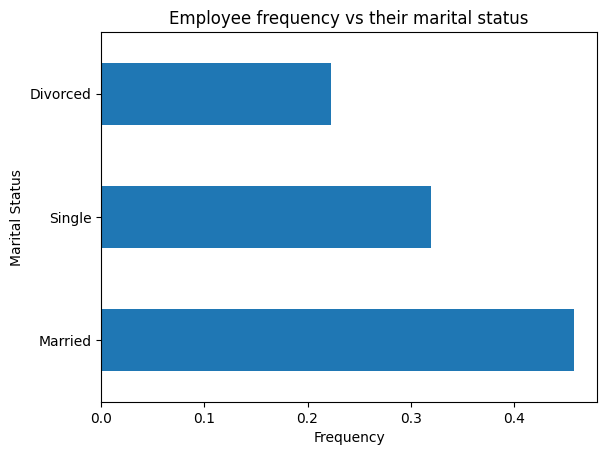

In [105]:
data["MaritalStatus"].value_counts(normalize = True).plot(
    kind = "barh",
    xlabel = "Frequency",
    ylabel = "Marital Status",
    title = "Employee frequency vs their marital status"
);

Most are married.<br>
Could it be that most of these employees are married?<br>
Creating a side by side bar chart using seaborn to see this visualization<br>

In [110]:
# creating a data frame `df_status_dist` of marital status and work life balance.
df_status = (
    data["MaritalStatus"]
    .groupby(data["WorkLifeBalance"])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_status

,WorkLifeBalance,MaritalStatus,frequency
0,1,Married,0.525000
1,1,Single,0.312500
2,1,Divorced,0.162500
3,2,Married,0.444767
4,2,Single,0.299419
5,2,Divorced,0.255814
6,3,Married,0.453527
7,3,Single,0.329227
8,3,Divorced,0.217245
9,4,Married,0.477124


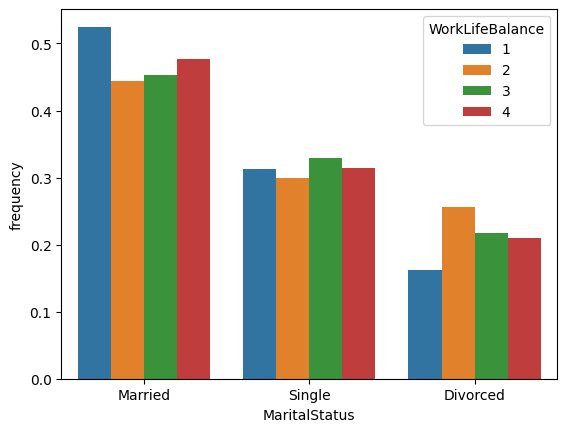

In [112]:
# Creating side by side barplot of distance from home and Marital Status setting age as hue
sb.barplot(
    x = "MaritalStatus",
    y = "frequency",
    hue = "WorkLifeBalance",
    data = df_status
);

Am not quite sure if I will be right to say the `married` group have a better worklife balance compared to the singles and divorced <br>
because there is no explanation to the numbers used to categorically group worklifebalance feature.<br>
But from the visualization above the `married` top in all levels<br>

TrainingTime vs MaritalStatus
---
Repeating the same exploration but using `TrainingTimesLastYear`.<br>
Which group happened to have been trained more?<br>
Are the married too busy to get time for training? lets find out.<br>

In [117]:
data["TrainingTimesLastYear"].nunique()

7

In [118]:
# creating a data frame `df_training` of marital status, `TrainingTimesLastYear` of employees.
df_training = (
    data["MaritalStatus"]
    .groupby(data["TrainingTimesLastYear"])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_training

,TrainingTimesLastYear,MaritalStatus,frequency
0,0,Married,0.407407
1,0,Single,0.333333
2,0,Divorced,0.259259
3,1,Married,0.563380
4,1,Single,0.295775
5,1,Divorced,0.140845
6,2,Married,0.449726
7,2,Single,0.314442
8,2,Divorced,0.235832
9,3,Married,0.482688


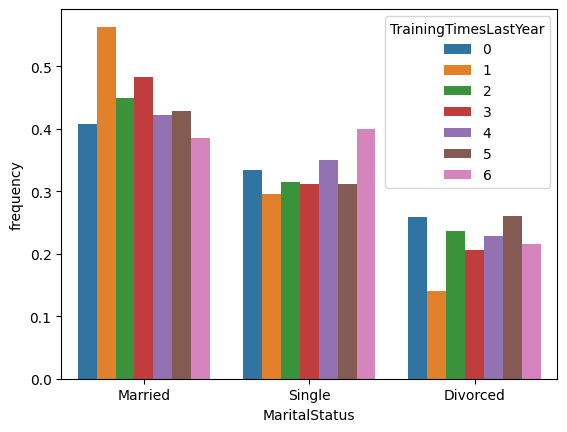

In [122]:
# Creating side by side barplot of TrainingTime and Marital Status setting 
sb.barplot(
    x = "MaritalStatus",
    y = "frequency",
    hue = "TrainingTimesLastYear",
    data = df_training
);

SPLIT
---

Splitting the dataset into X, y that is the feature matrix and target vector

In [126]:
target = "Age"
X = data.drop(columns = target)
y = data[target]

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (1470, 23)
Target Vector Shape: (1470,)


Splitting the dataset into train and test sets (horizontal split)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 23)
y_train shape: (1176,)
X_test shape: (294, 23)
y_test shape: (294,)


BUILD MODEL
---

Baseline model
---

In [135]:
# Finding the mean age on our target
y_mean = y_train.mean()
y_mean.round(4)

36.7747

Just as we seen from our visualizations that majority are between ages 30 and 40 and here the mean age of employees is in that range.

In [136]:
# Creating a list named y_pred_baseline containing the values of y_mean
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[36.77465986394558,
 36.77465986394558,
 36.77465986394558,
 36.77465986394558,
 36.77465986394558]

In [137]:
# Clculating baseline mean absolute Error
mae_baseline =mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 7.47


This baseline tells us that for every age predicted we are of by an avarange of `7.47`<br>
And that our models `mean_absolute_error` needs to be lower than this.